Q.  Create a Multi variable Regression model of your choice using suitable dataset.

Regression Models: 
1. Multiple Regression 

2. Naive Bayes Regression Model

3. Naive Bayes Classification Model

4. Random Forest Classification Model

Perform EDA on the dataset and implement the model and calculate accuracy score, Precision, Recall, F1 score of each linear model

Importing all necessary library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

Load the dataset and displaying head of the dataset.

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Checking null values

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Plot the distribution of the target variable 'class'

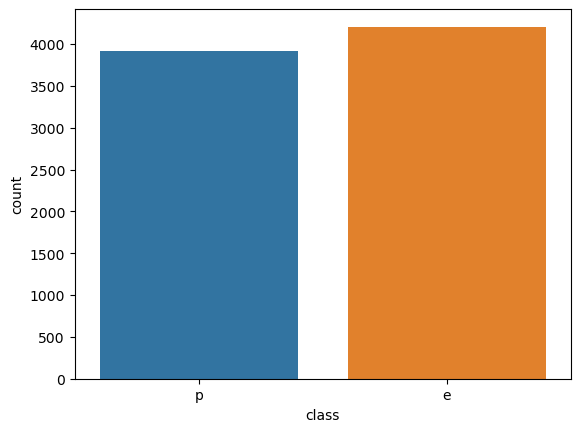

In [5]:
sns.countplot(x='class', data=df)

plt.show()

Encoding dataset and print head

In [6]:
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [7]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Getting correlation having strongest value

In [8]:
correlation_matrix = df.corr()

In [9]:
# Get absolute values of correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Get pairs of variables with high correlation
strong_corrs = abs_corr_matrix.stack().reset_index()
strong_corrs.columns = ['Feature1', 'Feature2', 'Correlation']
strong_corrs = strong_corrs[strong_corrs['Feature1'] != strong_corrs['Feature2']]
strong_corrs = strong_corrs.sort_values(by='Correlation', ascending=False)

In [10]:
top_cor = strong_corrs.head(30)
print(top_cor)

                   Feature1                Feature2  Correlation
358              veil-color         gill-attachment     0.897518
148         gill-attachment              veil-color     0.897518
400               ring-type                 bruises     0.692973
106                 bruises               ring-type     0.692973
405               ring-type              gill-color     0.629398
216              gill-color               ring-type     0.629398
195               gill-size       spore-print-color     0.622991
426       spore-print-color               gill-size     0.622991
176               gill-size                   class     0.540024
8                     class               gill-size     0.540024
429       spore-print-color              stalk-root     0.536996
261              stalk-root       spore-print-color     0.536996
9                     class              gill-color     0.530566
198              gill-color                   class     0.530566
174            gill-spaci

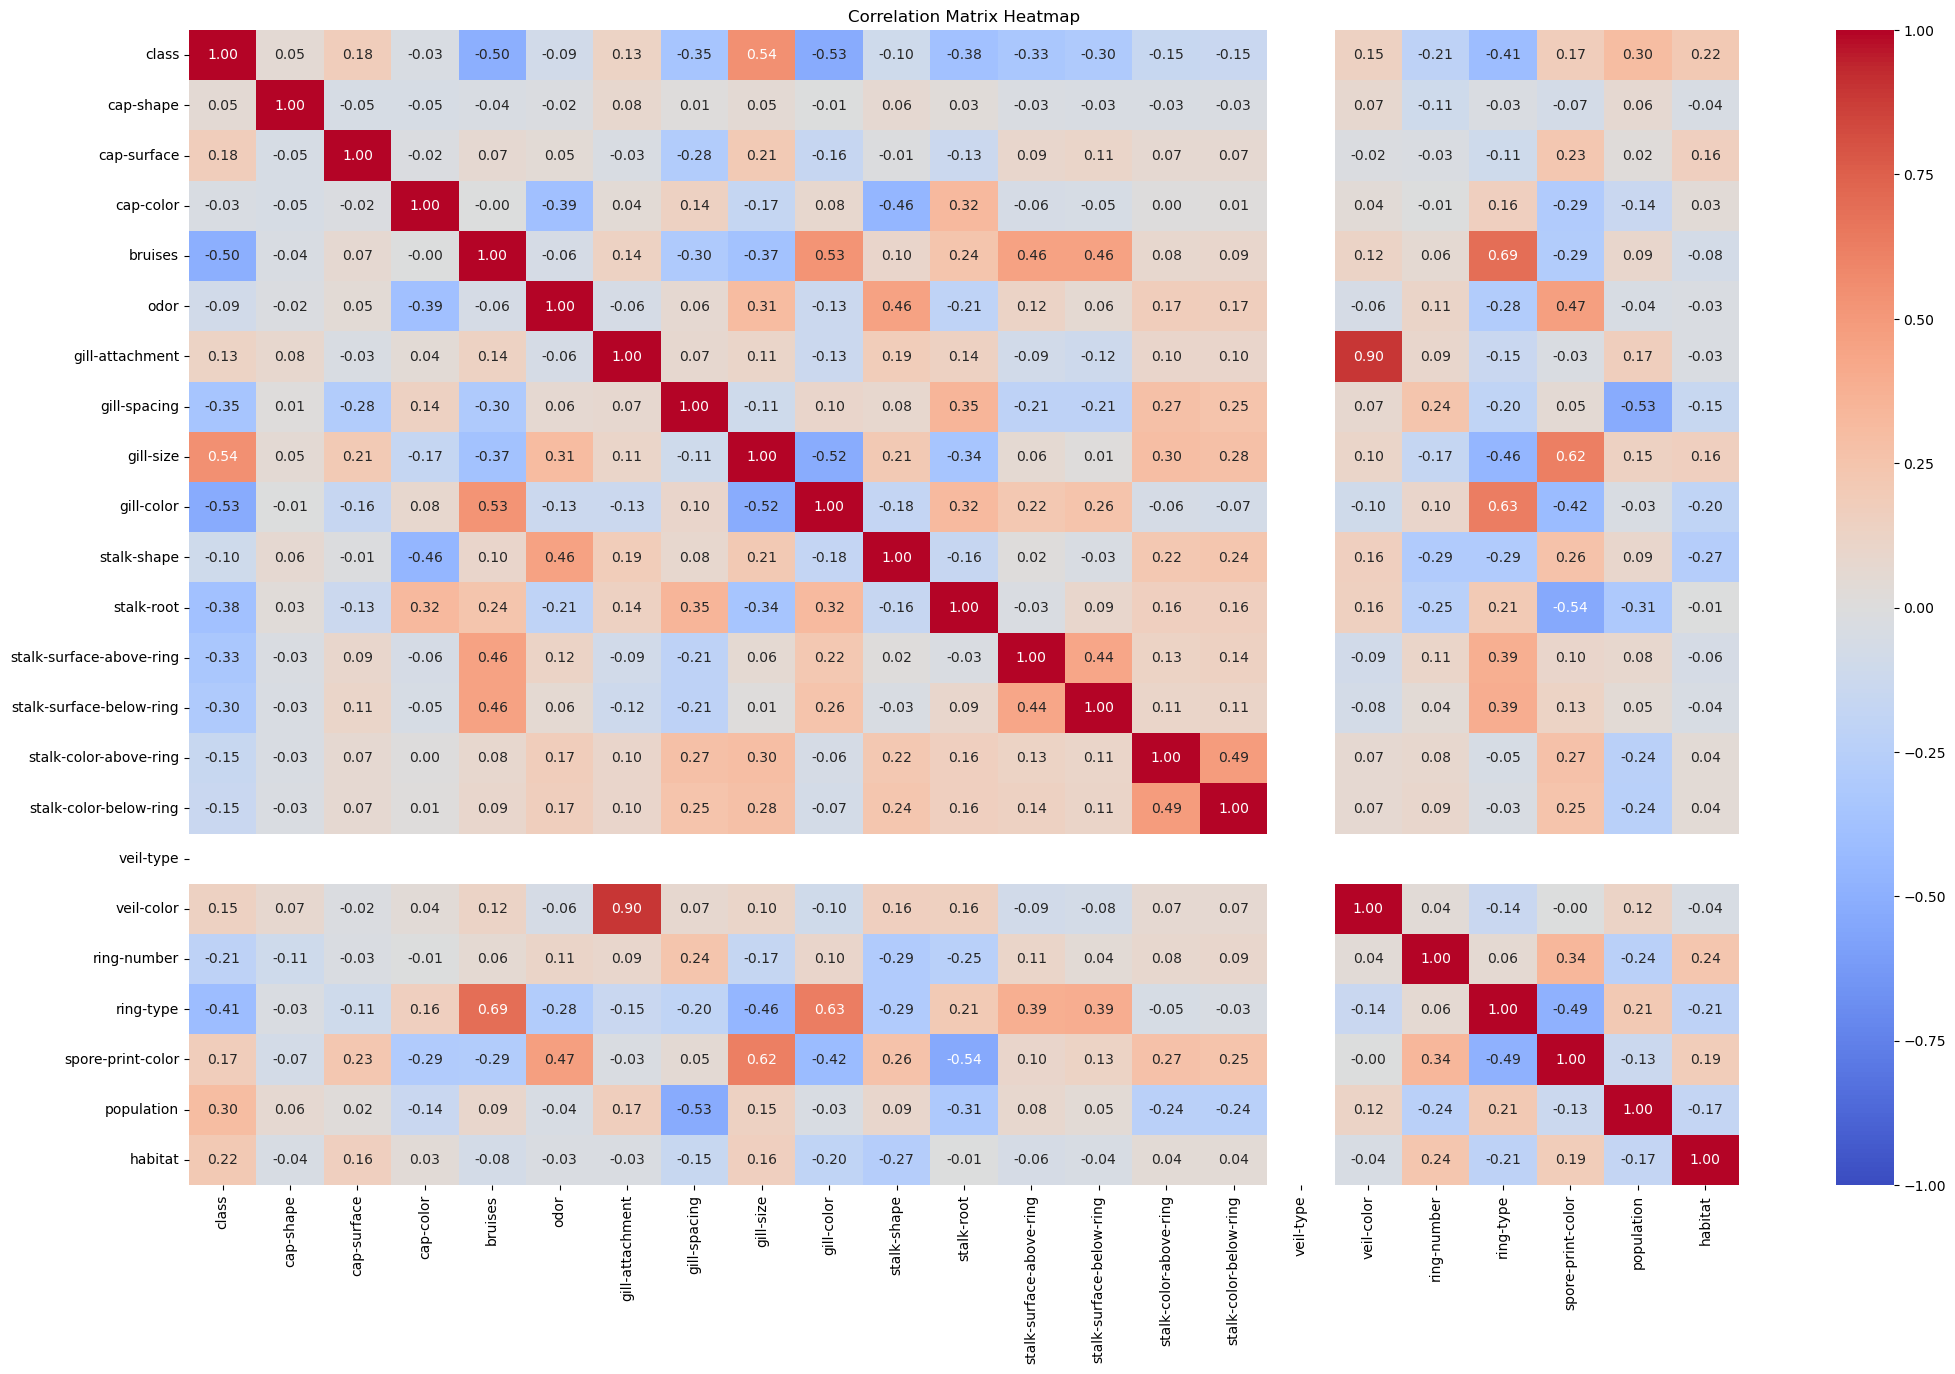

In [11]:
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Correlation having highest value

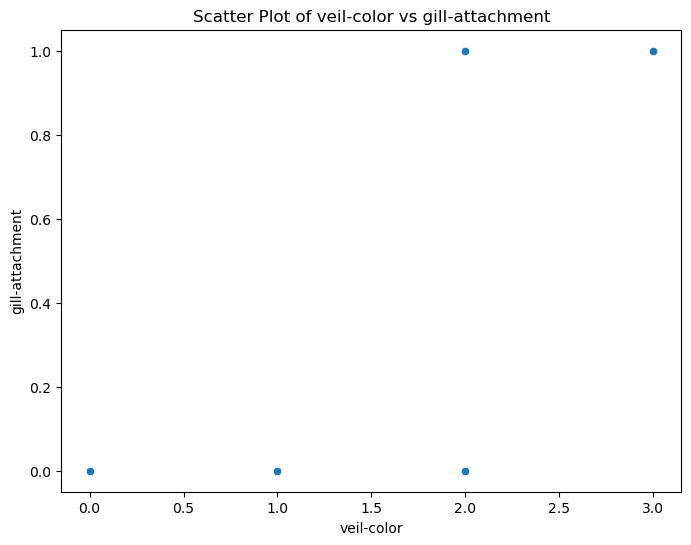

In [12]:
top_corr_pair = strong_corrs.iloc[0]
feature1 = top_corr_pair['Feature1']
feature2 = top_corr_pair['Feature2']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[feature1], y=df[feature2])
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()


Feature and target for regression model

In [13]:
features = ['gill-spacing', 'ring-type', 'gill-size', 'gill-color']
target = 'class'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Multiple Regression

In [14]:
# Multiple Regression
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)

print("Multiple Regression Evaluation:")
print(f"R-squared: {r2_score(y_test, y_pred_reg):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_reg):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_reg):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_reg, squared=False):.2f}")

Multiple Regression Evaluation:
R-squared: 0.48
MAE: 0.30
MSE: 0.13
RMSE: 0.36


Scatter Plot of Actual vs. Predicted Values

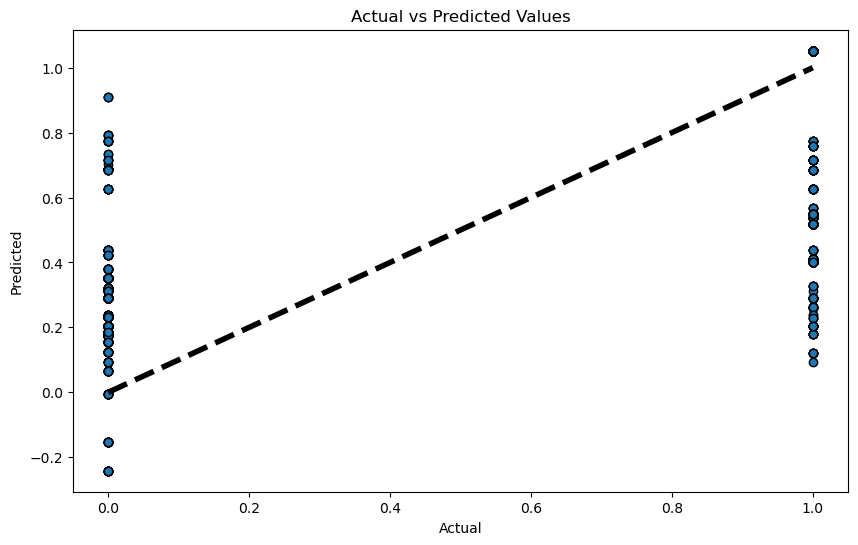

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

Residual Plot

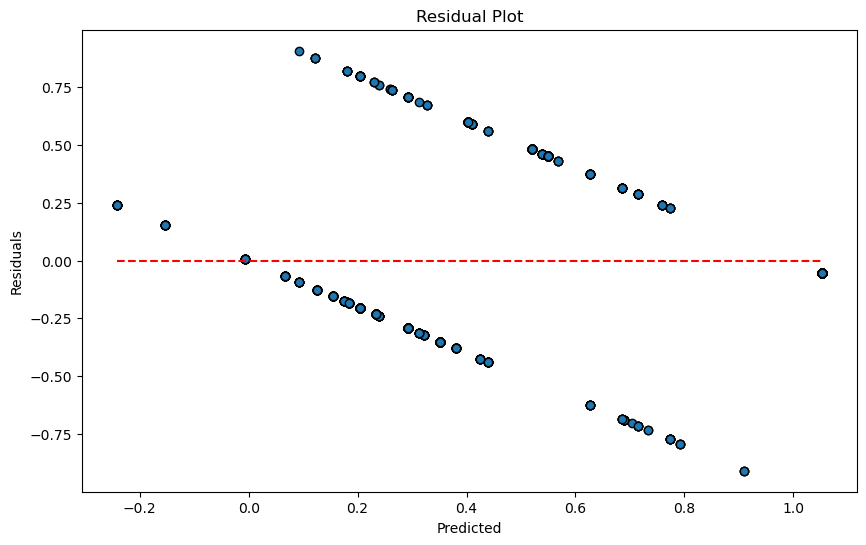

In [31]:
residuals = y_test - y_pred_reg
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=y_pred_reg.min(), xmax=y_pred_reg.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Histogram of Residuals

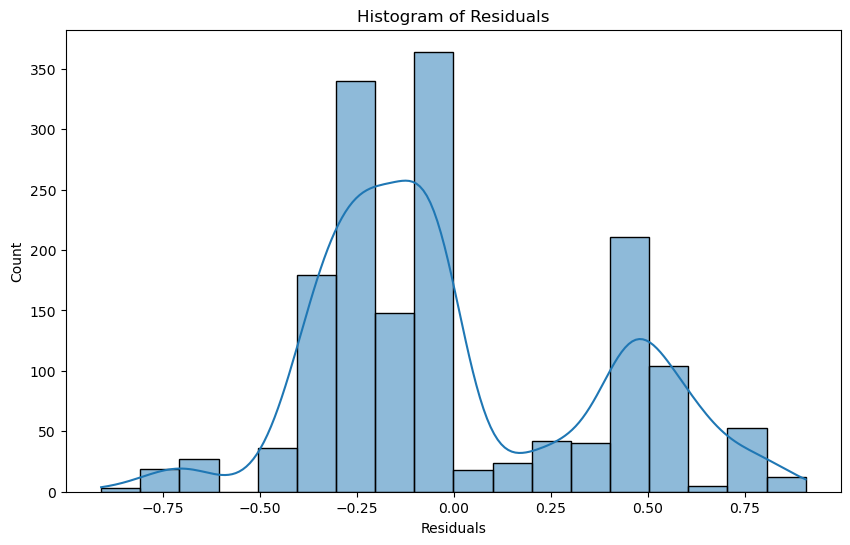

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

### Decision-Tree Regression

In [24]:
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

# Evaluation
print("Decision Tree Regression Evaluation:")
print(f"R-squared: {r2_score(y_test, y_pred_tree):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_tree):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_tree):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_tree, squared=False):.2f}")

Decision Tree Regression Evaluation:
R-squared: 0.98
MAE: 0.01
MSE: 0.00
RMSE: 0.07


The decision tree plot

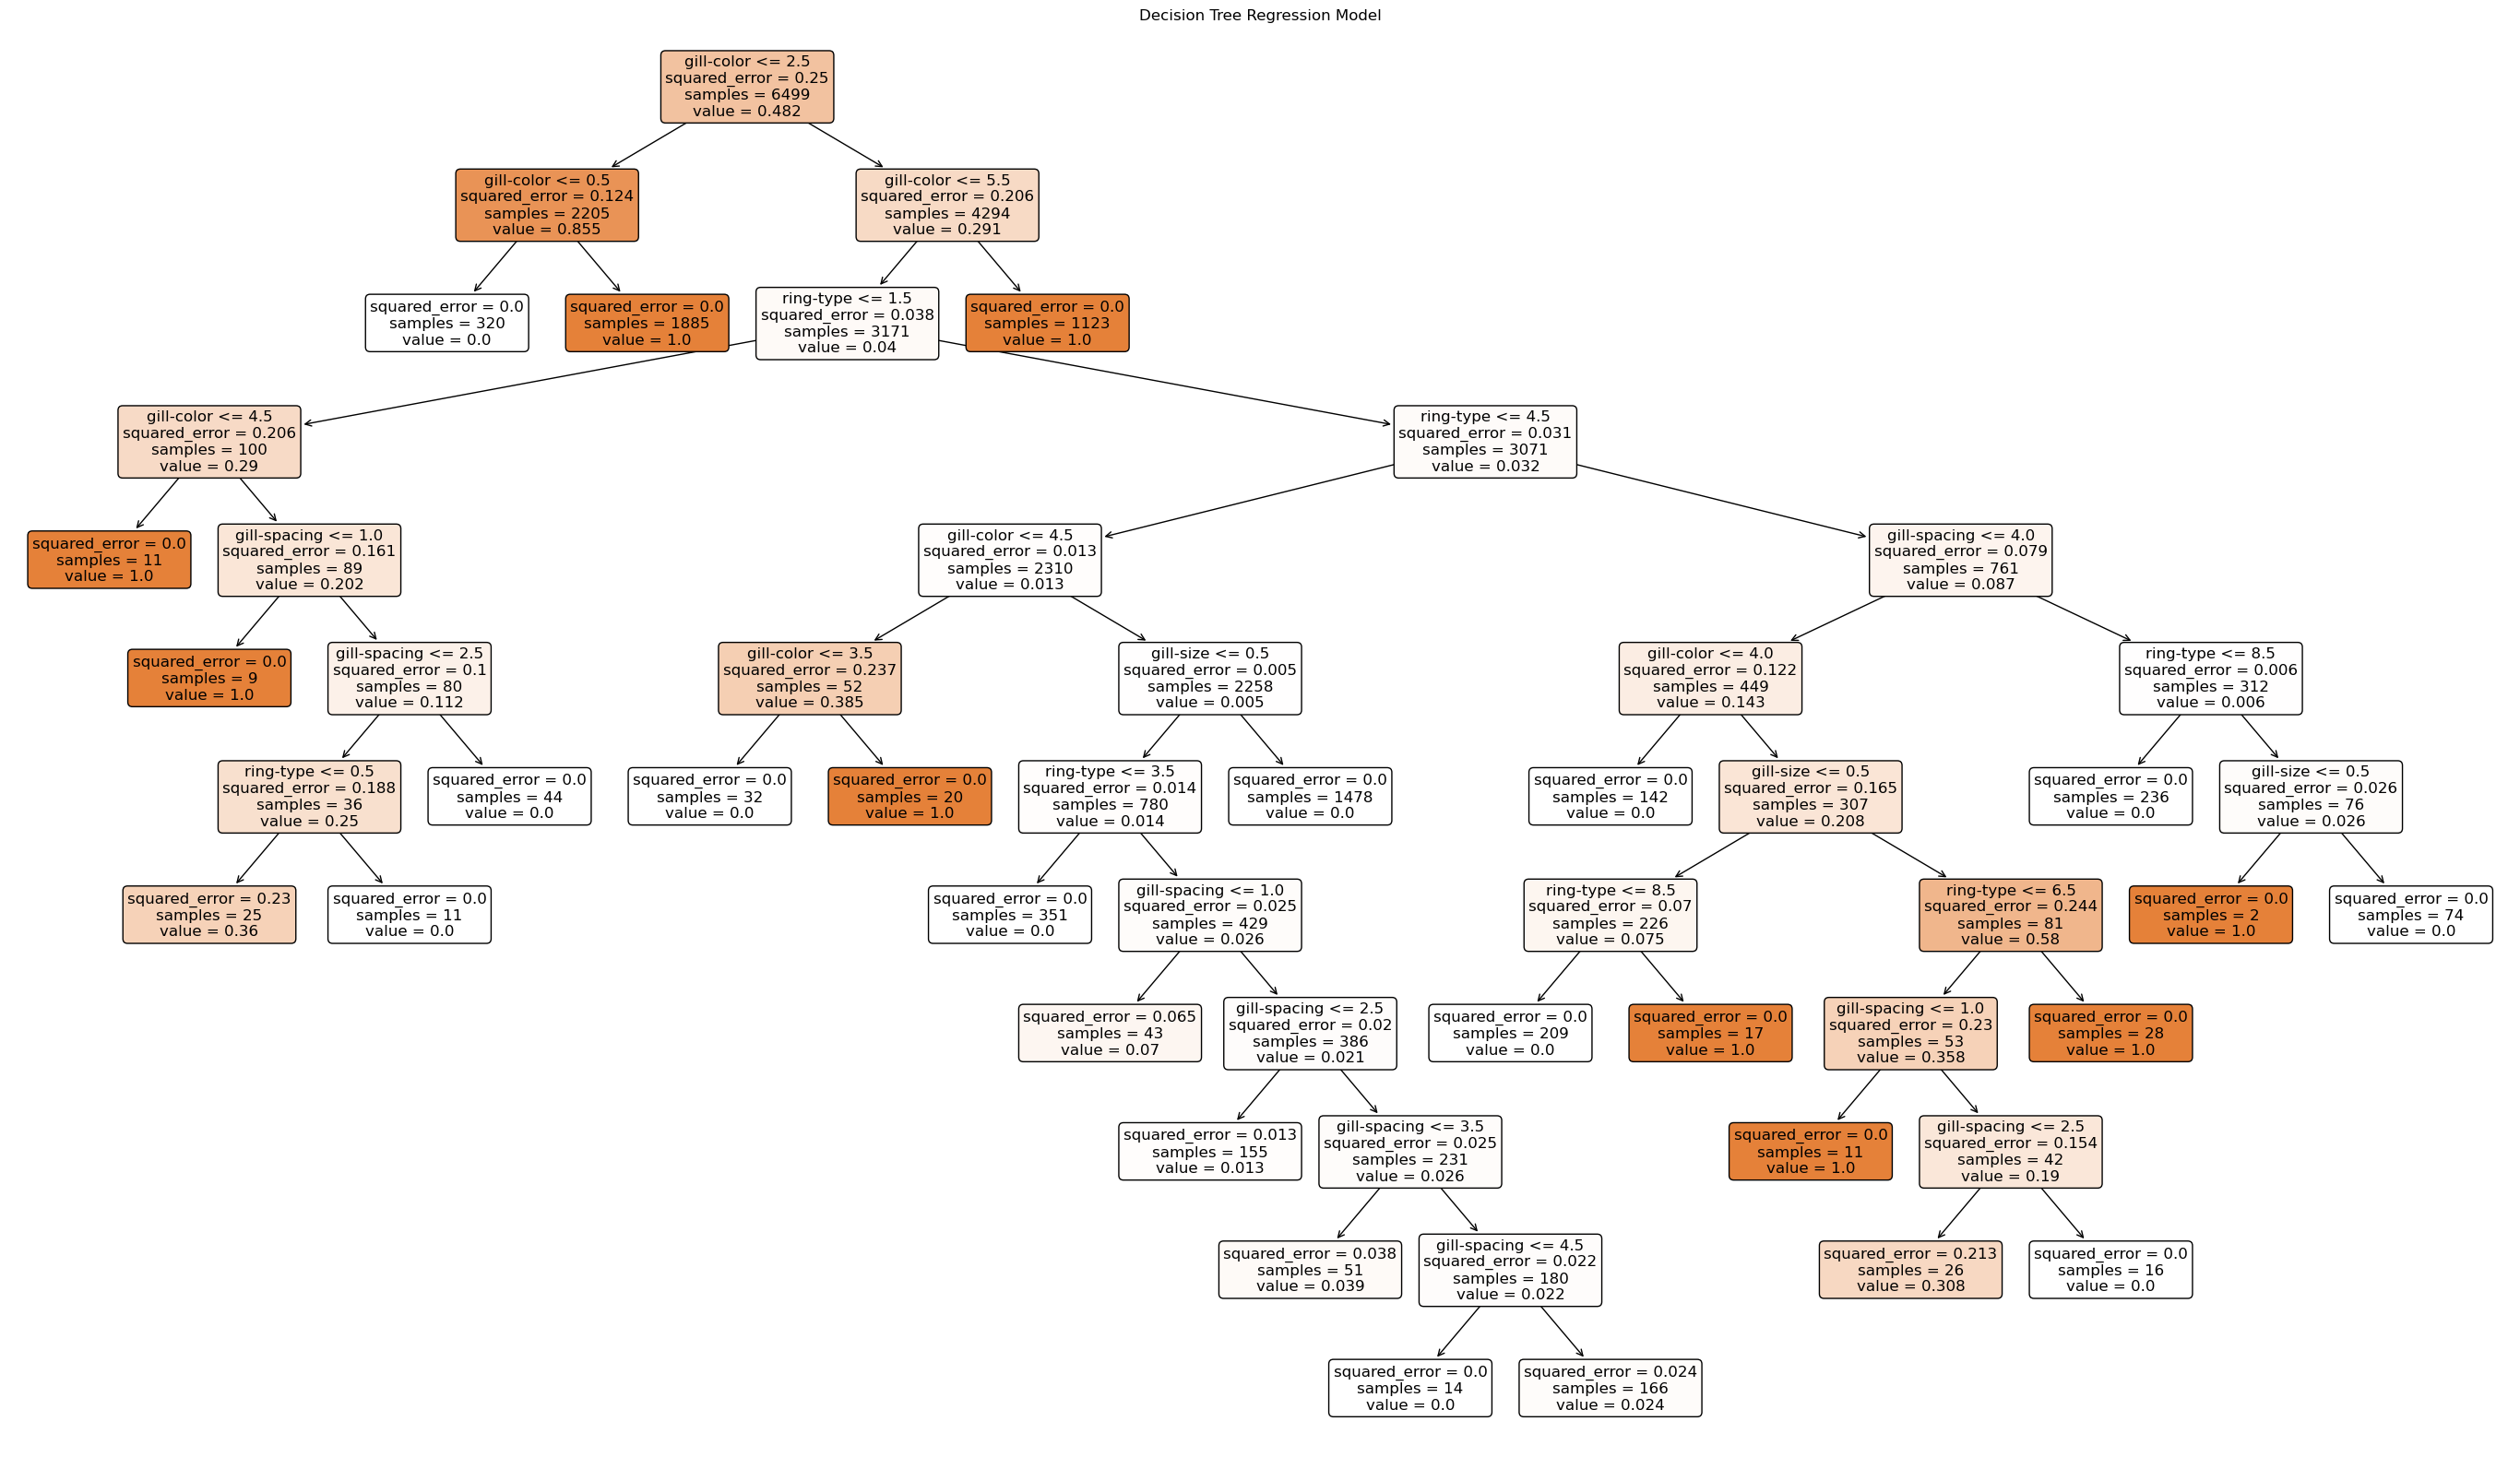

In [28]:
# Plotting the decision tree
plt.figure(figsize=(35, 20))
plot_tree(model_tree, feature_names=features, filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Regression Model')
plt.show()

Feature Importances Plot

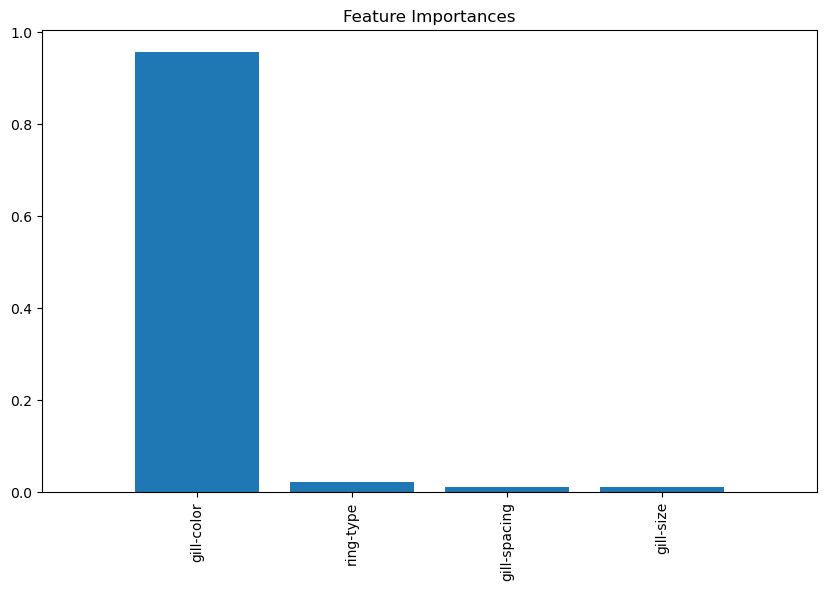

In [29]:
importances = model_tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Feature and target for classification model

In [15]:
classification_features = ['cap-shape', 'cap-color', 'bruises', 'odor']
classification_target = 'class'

classification_X = df[classification_features]
classification_y = df[classification_target]

X_train, X_test, y_train, y_test = train_test_split(classification_X, classification_y, test_size=0.2, random_state=42)

### Naive Bayes Classification

In [16]:
# Naive Bayes Classification
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

print("\nNaive Bayes Classification Evaluation:")
print(f"Accuracy Score:{ accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb, average='weighted'):.2f}")



Naive Bayes Classification Evaluation:
Accuracy Score:0.73
Precision: 0.74
Recall: 0.73
F1 Score: 0.73


Confusion Matrix for Naive Bayes classification model.

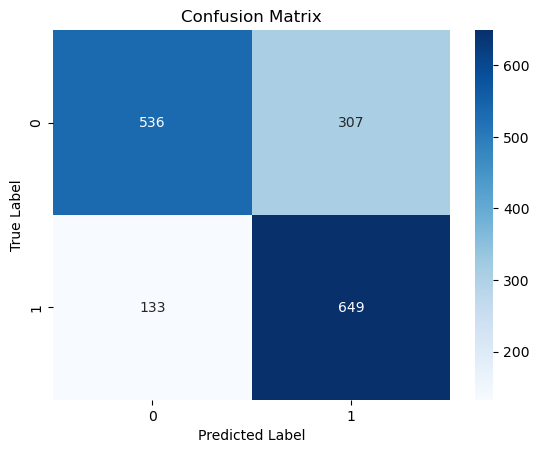

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)  # Replace y_pred_rf with your predictions

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The ROC curve (Receiver Operating Characteristic curve) for Naive Bayes classification model.

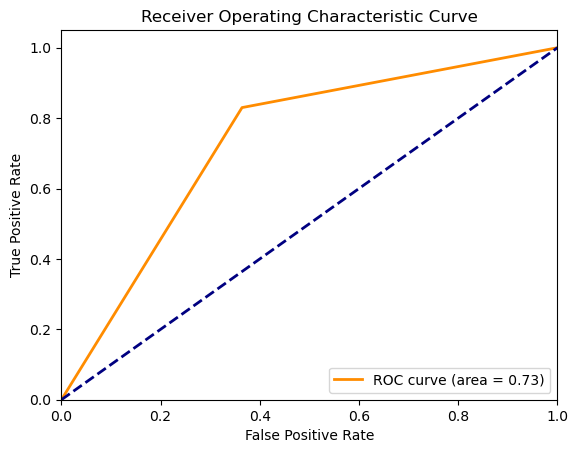

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_pred_nb) 
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


### Random Forest Classification

In [19]:
# Random Forest Classification
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("\nRandom Forest Classification Evaluation:")
print(f"Accuracy Score:{ accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")



Random Forest Classification Evaluation:
Accuracy Score:0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


Confusion Matrix for RandomForest classification model.

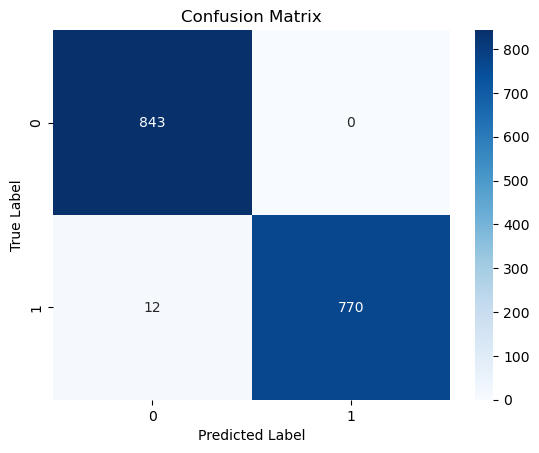

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The ROC curve (Receiver Operating Characteristic curve) for RandomForest classification model.

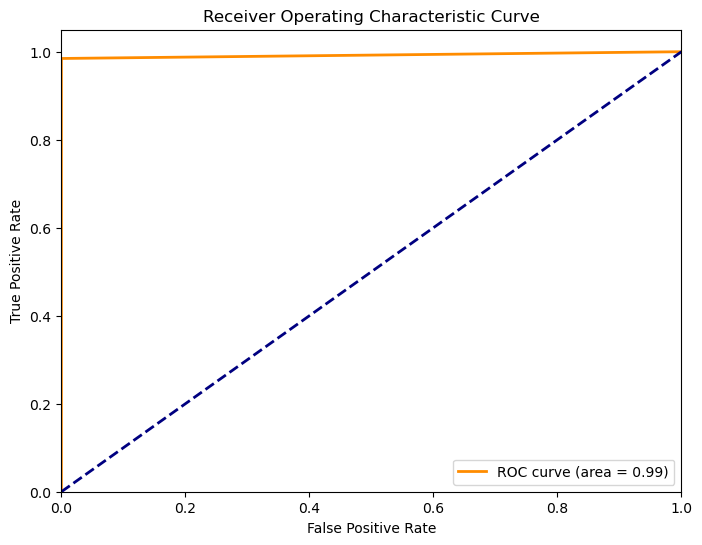

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_pred_rf) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


Feature Importances Plot (For tree-based classifiers like Random Forest, you can plot the importance of features.)

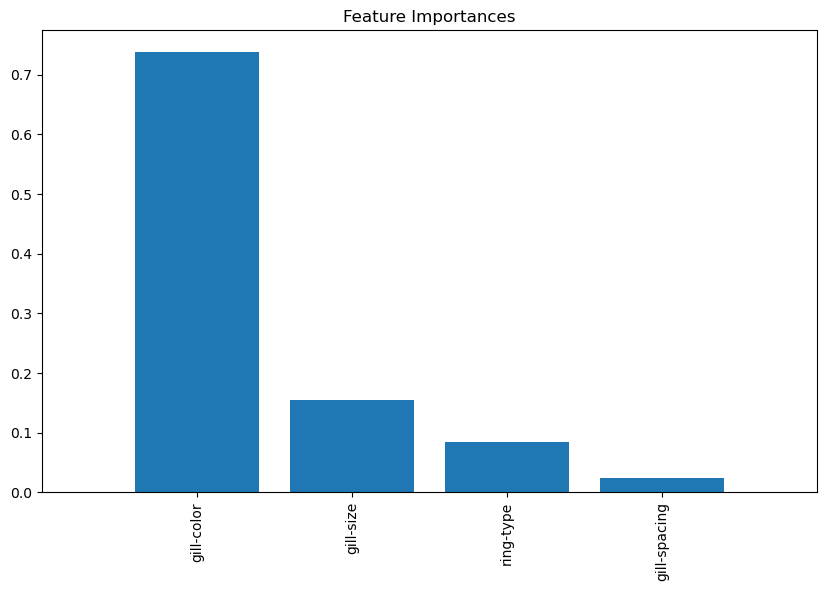

In [22]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
